In [5]:
import pandas as pd
df = pd.read_csv('train_preprocess.tsv', sep='\t', names=["text", "label"])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
 1   label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [7]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [11]:
df.tail()

,text,label
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative
10999,meskipun sering belanja ke yogya di riau junct...,positive


In [13]:
df.shape

(11000, 2)

### Cek total duplikat data

In [14]:
df.duplicated().sum()

67

Menghilangkan data yang duplikat

In [15]:
df = df.drop_duplicates()

Cek total data yang duplikat. Hasilnya data yang duplikat sudah tidak ada.

In [16]:
df.duplicated().sum()

0

### Cek missing value

In [17]:
df.isna()

,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10993,False,False
10994,False,False
10996,False,False
10998,False,False


In [19]:
df.isna().sum() / df.shape[0]

text     0.0
label    0.0
dtype: float64

In [22]:
df["total_char"] = df.text.apply(len)

C:\Users\Asani\AppData\Local\Temp\ipykernel_12964\898553682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_char"] = df.text.apply(len)


In [23]:
df.head()

,text,label,total_word,total_char
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404,404
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102,102
2,lokasi strategis di jalan sumatera bandung . t...,positive,184,184
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93,93
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214,214


### Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

In [24]:
df["total_word"] = df.text.apply(lambda sent: len(sent.split()))

C:\Users\Asani\AppData\Local\Temp\ipykernel_12964\2902172080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_word"] = df.text.apply(lambda sent: len(sent.split()))


In [25]:
df.head()

,text,label,total_word,total_char
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66,404
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17,102
2,lokasi strategis di jalan sumatera bandung . t...,positive,33,184
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17,93
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38,214


In [34]:
df['total_char'].mean()

189.61456141955549

In [35]:
df['total_word'].mean()

33.060550626543495

Dari data yang digunakan, disimpulkan bahwa total character dan total word adalah 189 dan 33

In [36]:
df['total_char'].median()

161.0

In [37]:
df['total_word'].median()

28.0

In [38]:
df['total_char'].mode()

0    120
Name: total_char, dtype: int64

In [39]:
df['total_word'].mode()

0    10
Name: total_word, dtype: int64

In [41]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

109

In [42]:
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

564

In [51]:
# cari nilai minimum
p0 = df.total_char.min()
# cari nilai maximum
p100 = df.total_char.max()

# Cari Quartile 1
q1 = df.total_char.quantile(0.25)
# Cari Quartile 2
q2 = df.total_char.quantile(0.5)
# Cari Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR (Interquartile Range)
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr
# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char' :", lower_limit)
print("NIlai minimum ", p0)

if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah.")
else:
    print("Ada outlier dari sisi batas bawah.")

print()
print("Batas Atas 'total_char': ", upper_limit)
print("Nilai maksimum ", p100)

if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas atas.")
else:
    print("Ada outlier dari sisi batas atas.")


Batas Bawah 'total_char' : -186.5
NIlai minimum  3
Tidak ada outlier dari sisi batas bawah.

Batas Atas 'total_char':  553.5
Nilai maksimum  567
Tidak ada outlier dari sisi batas atas.


In [54]:
check = df[["total_char", "total_word"]]
check.var()

total_char    14600.712931
total_word      446.955536
dtype: float64

In [55]:
print("total char: ", df['total_char'].var())
print("total word: ", df['total_word'].var())

total char:  14600.712931011893
total word:  446.9555356279938


In [57]:
df.describe()

,total_word,total_char
count,10933.000000,10933.000000
mean,33.060551,189.614561
std,21.141323,120.833410
min,1.000000,3.000000
25%,16.000000,91.000000
50%,28.000000,161.000000
75%,48.000000,276.000000
max,110.000000,567.000000


In [67]:
df[df['total_word'] == df['total_word'].min()]

,text,label,total_word,total_char
9,bersyukur,positive,1,9
69,marah,negative,1,5
180,mengagumi,positive,1,9
209,takut,negative,1,5
266,berantakan,negative,1,10
...,...,...,...,...
10262,kesepian,negative,1,8
10319,suka,positive,1,4
10667,amburadul,negative,1,9
10713,sombong,negative,1,7


In [70]:
check = df[["total_char", "total_word"]]
check.std()

total_char    120.833410
total_word     21.141323
dtype: float64

In [71]:
check = df[["total_char", "total_word"]]
check.skew()

total_char    0.560780
total_word    0.536978
dtype: float64

In [72]:
check = df[["total_char", "total_word"]]
check.kurtosis()

total_char   -0.756575
total_word   -0.769288
dtype: float64

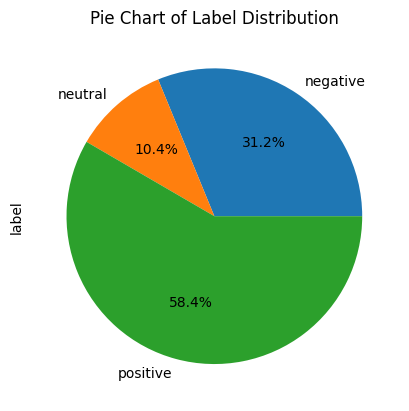

In [76]:
import matplotlib.pyplot as plt

df.groupby('label').label.count().plot(kind='pie', autopct='%1.1f%%', counterclock=True)
plt.title('Pie Chart of Label Distribution')
plt.show()

<Axes: >

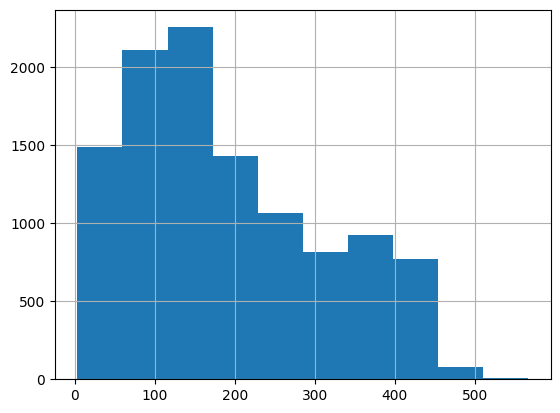

In [79]:
df.total_char.hist()

In [78]:
from wordcloud import wordcloud